In [1]:
import pandas as pd
import seaborn as sn 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from scipy.stats import gmean
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
df = pd.read_excel(r'/Users/katushka/Downloads/Bok.xlsx',index_col=0) #importing dataset
df = df.T #dataset transposing
print(df)

Parameter Concern for collateral damage (Attacker) Risk tolerance (Attacker)  \
ABC1                                           mid                  mid/high   
ABC2                                           mid                  mid/high   
ABC3                                           low                      high   
ABC4                                      mid/high                   low/mid   
ABC5                                           low                      high   
ABC6                                           low                      high   
ABC7                                           mid                  mid/high   
ABC8                                           mid                  mid/high   
ABC9                                           low                      high   
ABC10                                     mid/high                   low/mid   
ABC11                                          low                      high   

Parameter Ability to repudiate Perceive

In [3]:
df.replace(to_replace = 'low', value = 0, inplace = True)
df.replace(to_replace = 'low/mid', value = 1, inplace = True)
df.replace(to_replace = 'mid', value = 2, inplace = True)
df.replace(to_replace = 'mid/high', value = 3, inplace = True)
df.replace(to_replace = 'high', value = 4, inplace = True)

#encoding descriptive values in dataset with numeric ones
#chosen range does not affect the final result, so, the values can be scale from 0 to 4 (as in the example), from -2 to 2, from 1 to 5 etc. The scale is up to you.

print(df)

Parameter  Concern for collateral damage (Attacker)  \
ABC1                                              2   
ABC2                                              2   
ABC3                                              0   
ABC4                                              3   
ABC5                                              0   
ABC6                                              0   
ABC7                                              2   
ABC8                                              2   
ABC9                                              0   
ABC10                                             3   
ABC11                                             0   

Parameter  Risk tolerance (Attacker)  Ability to repudiate  \
ABC1                               3                     1   
ABC2                               3                     0   
ABC3                               4                     3   
ABC4                               1                     4   
ABC5                         

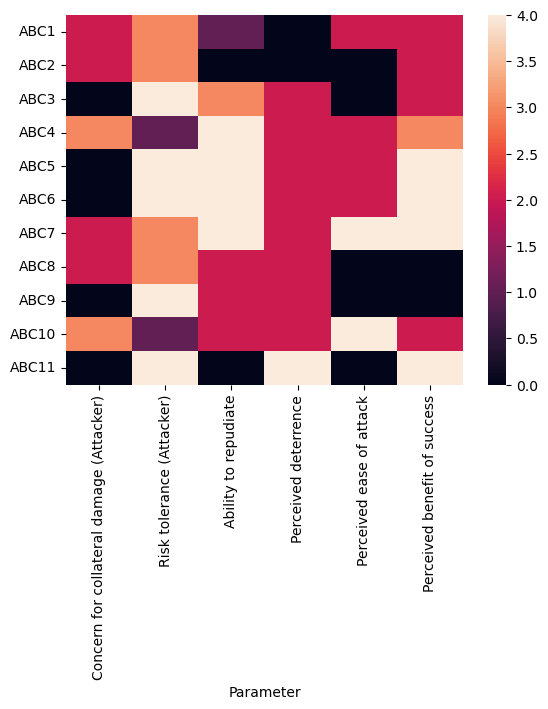

In [4]:
hm = sn.heatmap(data = df) #visualization of dataset as a heatmap

plt.show()

In [5]:
df_scaled = MinMaxScaler().fit_transform(df) #scaling dataset to the diapason (0,1)
print(df_scaled)

[[0.66666667 0.66666667 0.25       0.         0.5        0.5       ]
 [0.66666667 0.66666667 0.         0.         0.         0.5       ]
 [0.         1.         0.75       0.5        0.         0.5       ]
 [1.         0.         1.         0.5        0.5        0.75      ]
 [0.         1.         1.         0.5        0.5        1.        ]
 [0.         1.         1.         0.5        0.5        1.        ]
 [0.66666667 0.66666667 1.         0.5        1.         1.        ]
 [0.66666667 0.66666667 0.5        0.5        0.         0.        ]
 [0.         1.         0.5        0.5        0.         0.        ]
 [1.         0.         0.5        0.5        1.         0.5       ]
 [0.         1.         0.         1.         0.         1.        ]]


In [6]:
pca = PCA(n_components=2) #creating PCA instance with reduction to 2 dimensions
pca_features = pca.fit_transform(df_scaled) #apply PCA to the dataset
print(pca_features)

[[ 0.22522399  0.39200654]
 [-0.06568005  0.7262422 ]
 [-0.6000179  -0.08140486]
 [ 0.89270476 -0.07291575]
 [-0.28065369 -0.71062483]
 [-0.28065369 -0.71062483]
 [ 0.57052215 -0.63372024]
 [-0.06820626  0.62471971]
 [-0.67164654  0.35639032]
 [ 1.03987331  0.16877336]
 [-0.7614661  -0.05884161]]


In [7]:
print('Shape before PCA: ', df_scaled.shape) #shape of original dataset
print('Shape after PCA: ', pca_features.shape) #shape of reducted dataset

Shape before PCA:  (11, 6)
Shape after PCA:  (11, 2)


In [8]:
pca_features = MaxAbsScaler().fit_transform(pca_features) #scale and print dataset after PCA

print(pca_features)

[[ 0.21658791  0.53977383]
 [-0.06316158  1.        ]
 [-0.57701057 -0.11209051]
 [ 0.85847454 -0.10040142]
 [-0.26989219 -0.97849565]
 [-0.26989219 -0.97849565]
 [ 0.54864583 -0.87260178]
 [-0.06559094  0.86020849]
 [-0.64589266  0.49073205]
 [ 1.          0.23239267]
 [-0.73226814 -0.08102202]]


In [9]:
df_pca = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'],
    index = df.index.values.tolist()) #adding column and raw names and creating pandas dataframe

print(df_pca)

            PC1       PC2
ABC1   0.216588  0.539774
ABC2  -0.063162  1.000000
ABC3  -0.577011 -0.112091
ABC4   0.858475 -0.100401
ABC5  -0.269892 -0.978496
ABC6  -0.269892 -0.978496
ABC7   0.548646 -0.872602
ABC8  -0.065591  0.860208
ABC9  -0.645893  0.490732
ABC10  1.000000  0.232393
ABC11 -0.732268 -0.081022


<Axes: xlabel='PC1', ylabel='PC2'>

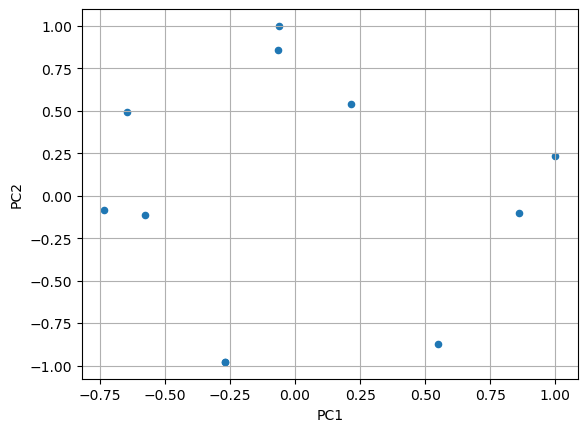

In [10]:
df_pca.plot.scatter(x="PC1", y="PC2", grid=True) #creating plot from the dataset
#each point represent the abuse case with 2 coordinates: principal component 1 (PC1) and principal component 2 (PC2)

In [11]:
euclidean_dist = euclidean_distances(df_pca, [[-1, -1]]) #calculate euclidean distances from the point to the point (-1,-1), which represent 0% probability of action

euclidean_dist = np.append(euclidean_dist, euclidean_distances([[1,1]], [[-1, -1]]),axis=0) #create an array of euclidean distances for each abuse case

print(euclidean_dist)

[[1.96239385]
 [2.20854391]
 [0.98351579]
 [2.06475306]
 [0.73042443]
 [0.73042443]
 [1.55387715]
 [2.08170506]
 [1.53221214]
 [2.34921086]
 [0.95718382]
 [2.82842712]]


In [12]:
euclidean_scaled = MaxAbsScaler().fit_transform(euclidean_dist) #scaling euclidean distances array
print(euclidean_scaled)

[[0.693811  ]
 [0.78083819]
 [0.34772534]
 [0.73000045]
 [0.25824403]
 [0.25824403]
 [0.54937854]
 [0.73599388]
 [0.5417188 ]
 [0.83057147]
 [0.33841559]
 [1.        ]]


In [13]:
index_list = df.index.values.tolist() 
index_list.append('max_probability') #add maximum probablity of 100% to the dataset as a threshold value

df_euclidean_scaled = pd.DataFrame(
    data=euclidean_scaled, 
    columns=['PoA'],
    index = index_list) #create pandas dataframe for euclidean distances

print(df_euclidean_scaled)

                      PoA
ABC1             0.693811
ABC2             0.780838
ABC3             0.347725
ABC4             0.730000
ABC5             0.258244
ABC6             0.258244
ABC7             0.549379
ABC8             0.735994
ABC9             0.541719
ABC10            0.830571
ABC11            0.338416
max_probability  1.000000


In [14]:
df_euclidean_scaled .style.format({'PoA': "{:.2%}"}) #transform values into percentages

,PoA
ABC1,69.38%
ABC2,78.08%
ABC3,34.77%
ABC4,73.00%
ABC5,25.82%
ABC6,25.82%
ABC7,54.94%
ABC8,73.60%
ABC9,54.17%
ABC10,83.06%
